In [1]:
# useful math functions
from math import pi

# importing QISKit
from qiskit import Aer, IBMQ=-9876
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy

In [8]:
backend = Aer.get_backend('qasm_simulator') # the device to run on
shots = 1024    # the number of shots in the experiment 

#to record the rotation number for encoding 00, 10, 11, 01
rotationNumbers = {"00":1, "11":3, "01":5, "10":7}
bitList = ['00', '01', '10', '11']

# Creating registers
# qubit for encoding 2 bits of information
qr = QuantumRegister(3)
# bit for recording the measurement of the qubit
cr = ClassicalRegister(2)

# dictionary for encoding circuits
qrac_circuits = {}
circuits = []
circuitNames = []

for bits in bitList:
    circuitName = "Encode"+bits
    circuitNames.append(circuitName)
    qrac_circuits[circuitName] = QuantumCircuit(qr, cr, name=circuitName)
    qrac_circuits[circuitName].ry(rotationNumbers[bits]*pi/4.0, qr[0])
    qrac_circuits[circuitName].cx(qr[0], qr[1])
    qrac_circuits[circuitName].ry(rotationNumbers[bits]*pi/4.0, qr[0])
    qrac_circuits[circuitName].h(qr[0])
    qrac_circuits[circuitName].cx(qr[0], qr[2])
#     qrac_circuits[circuitName].measure(qr[1], cr[0])
#     qrac_circuits[circuitName].measure(qr[2], cr[1])
    qrac_circuits[circuitName].measure_all()
    circuits.append(qrac_circuits[circuitName])
    

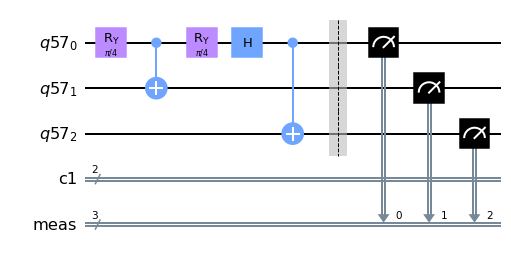

In [9]:
job = execute(circuits, backend=backend, shots=shots)
results = job.result()
circuits[circuitNames.index('Encode00')].draw('mpl')

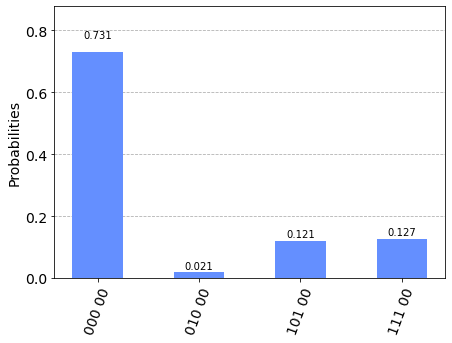

In [10]:
#We should measure "00" with probability 0.73
plot_histogram(results.get_counts(circuits[circuitNames.index("Encode00")]))

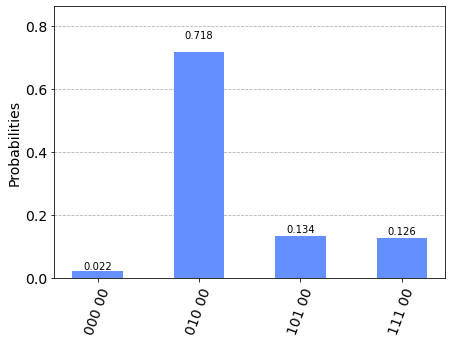

In [11]:
plot_histogram(results.get_counts(circuits[circuitNames.index("Encode01")]))

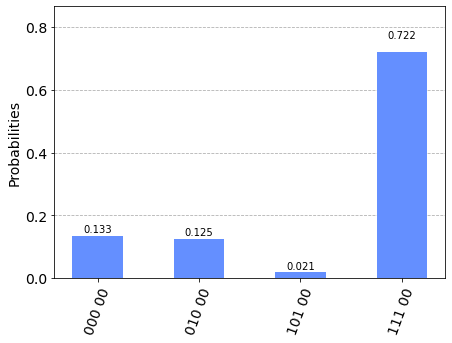

In [12]:
plot_histogram(results.get_counts(circuits[circuitNames.index("Encode11")]))

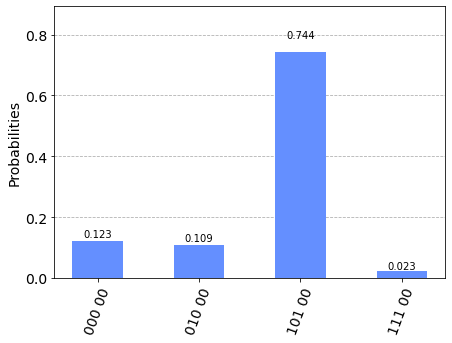

In [13]:
plot_histogram(results.get_counts(circuits[circuitNames.index("Encode10")]))